In [1]:
from pgraph import *
import json
from roboticstoolbox import path_to_datafile
from spatialmath import base
import numpy as np

np.set_printoptions(precision=3)
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

%matplotlib notebook

In [2]:
with open(path_to_datafile('data/queensland.json'), 'r') as f:
   data = json.loads(f.read())


<IPython.core.display.Javascript object>


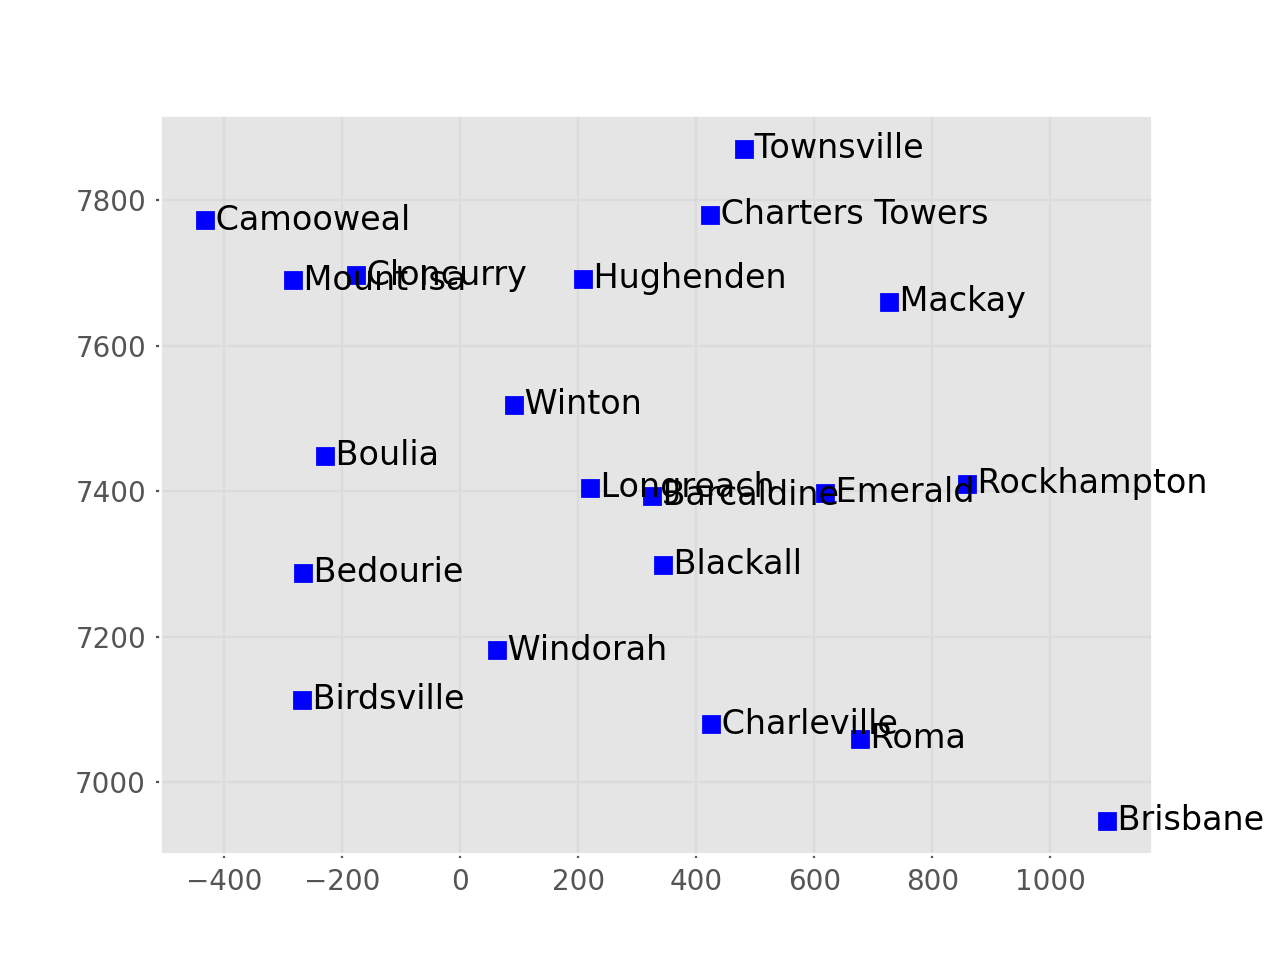

In [3]:
for name, info in data['places'].items():
    base.plot_point(info['utm'], text=name)

In [4]:
g = UGraph()
for name, info in data['places'].items():
   g.add_vertex(name=name, coord=info["utm"])
for route in data['routes']:
   g.add_edge(route['start'], route['end'], cost=route['distance'])

In [5]:
data

{'places': {'Brisbane': {'lat': -27.4697707,
   'lon': 153.0251235,
   'utm': [1095.9145867144744, 6947.043658018596]},
  'Camooweal': {'lat': -19.920667,
   'lon': 138.1213324,
   'utm': [-432.103885525028, 7772.551709375787]},
  'Mount Isa': {'lat': -20.7255748,
   'lon': 139.4927085,
   'utm': [-283.3325926415254, 7689.989162769402]},
  'Cloncurry': {'lat': -20.7063927,
   'lon': 140.5093258,
   'utm': [-176.971789275437, 7696.747610678524]},
  'Hughenden': {'lat': -20.85,
   'lon': 144.2,
   'utm': [208.62239381884905, 7691.917660932694]},
  'Charters Towers': {'lat': -20.0769637,
   'lon': 146.2601362,
   'utm': [422.6424087047931, 7779.8303889114595]},
  'Townsville': {'lat': -19.2589635,
   'lon': 146.8169483,
   'utm': [480.763802457357, 7870.508270739987]},
  'Boulia': {'lat': -22.911306,
   'lon': 139.910444,
   'utm': [-228.32608073938195, 7448.695027567425]},
  'Winton': {'lat': -22.3913,
   'lon': 143.0381,
   'utm': [91.94835708401399, 7518.4805284370905]},
  'Bedourie': 

<IPython.core.display.Javascript object>


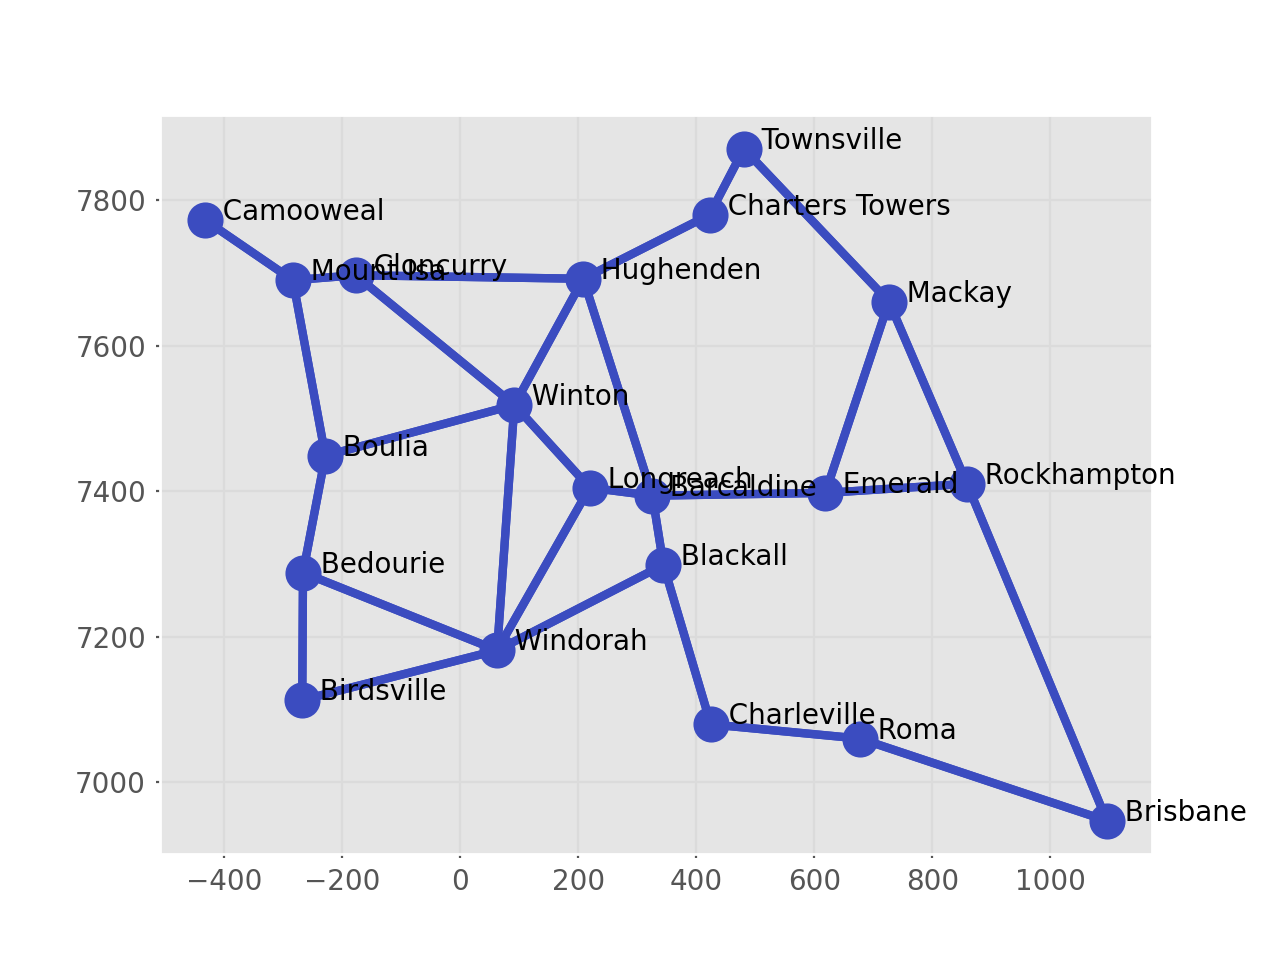

In [6]:
g.plot()

In [7]:
g.n

20

In [7]:
g.ne

29

In [8]:
g['Brisbane']

UVertex(name=Brisbane, coord=[1095.915 6947.044])

In [9]:
g['Brisbane'].neighbours() 

[UVertex(name=Rockhampton, coord=[ 858.854 7410.15 ]),
 UVertex(name=Roma, coord=[ 677.663 7060.014])]

In [10]:
g['Brisbane'].degree

2

In [11]:
g.average_degree()

2.9

In [12]:
g.average_degree()

2.9

In [13]:
g.nc

1

In [14]:
g['Brisbane'].edges()

[Edge [Rockhampton] -- [Brisbane], cost=682,
 Edge [Brisbane] -- [Roma], cost=482]

In [15]:
g['Brisbane'].edges()[0].vertices()

[UVertex(name=Rockhampton, coord=[ 858.854 7410.15 ]),
 UVertex(name=Brisbane, coord=[1095.915 6947.044])]

In [16]:
g['Brisbane'].edgeto(g['Rockhampton'])

Edge [Rockhampton] -- [Brisbane], cost=682

In [17]:
D = g.distances()
with np.printoptions(formatter=dict(float=lambda x: "{:3.0f}".format(x))):
    print(D)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 482   0   0 682]
 [  0   0 188   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 188   0 118   0   0   0 304   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 118   0 401   0   0   0 350   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 401   0 248   0   0 216   0   0   0   0 500   0   0   0   0   0   0]
 [  0   0   0   0 248   0 135   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 135   0   0   0   0   0   0   0   0   0   0   0   0 388   0]
 [  0   0 304   0   0   0   0   0 363 194   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 350 216   0   0 363   0   0   0 487 180   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 194   0   0 193 411   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 193   0 380   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 487 411 380   0 311   0 530   0   0   0   0   0]
 [  

In [18]:
path, length = g.path_BFS('Hughenden', 'Brisbane', verbose=True)

FRONTIER: Hughenden
EXPLORED: 
   expand Hughenden
      add Cloncurry to the frontier
      add Charters Towers to the frontier
      add Barcaldine to the frontier
      add Winton to the frontier
     move Hughenden  to the explored list
FRONTIER: Cloncurry, Charters Towers, Barcaldine, Winton
EXPLORED: Hughenden
   expand Cloncurry
      add Mount Isa to the frontier
     move Cloncurry  to the explored list
FRONTIER: Charters Towers, Barcaldine, Winton, Mount Isa
EXPLORED: Hughenden, Cloncurry
   expand Charters Towers
      add Townsville to the frontier
     move Charters Towers  to the explored list
FRONTIER: Barcaldine, Winton, Mount Isa, Townsville
EXPLORED: Hughenden, Cloncurry, Charters Towers
   expand Barcaldine
      add Blackall to the frontier
      add Emerald to the frontier
      add Longreach to the frontier
     move Barcaldine  to the explored list
FRONTIER: Winton, Mount Isa, Townsville, Blackall, Emerald, Longreach
EXPLORED: Hughenden, Cloncurry, Charters Tower

In [19]:
length

1759

In [20]:
[p.name for p in path]

['Hughenden', 'Barcaldine', 'Emerald', 'Rockhampton', 'Brisbane']

<IPython.core.display.Javascript object>


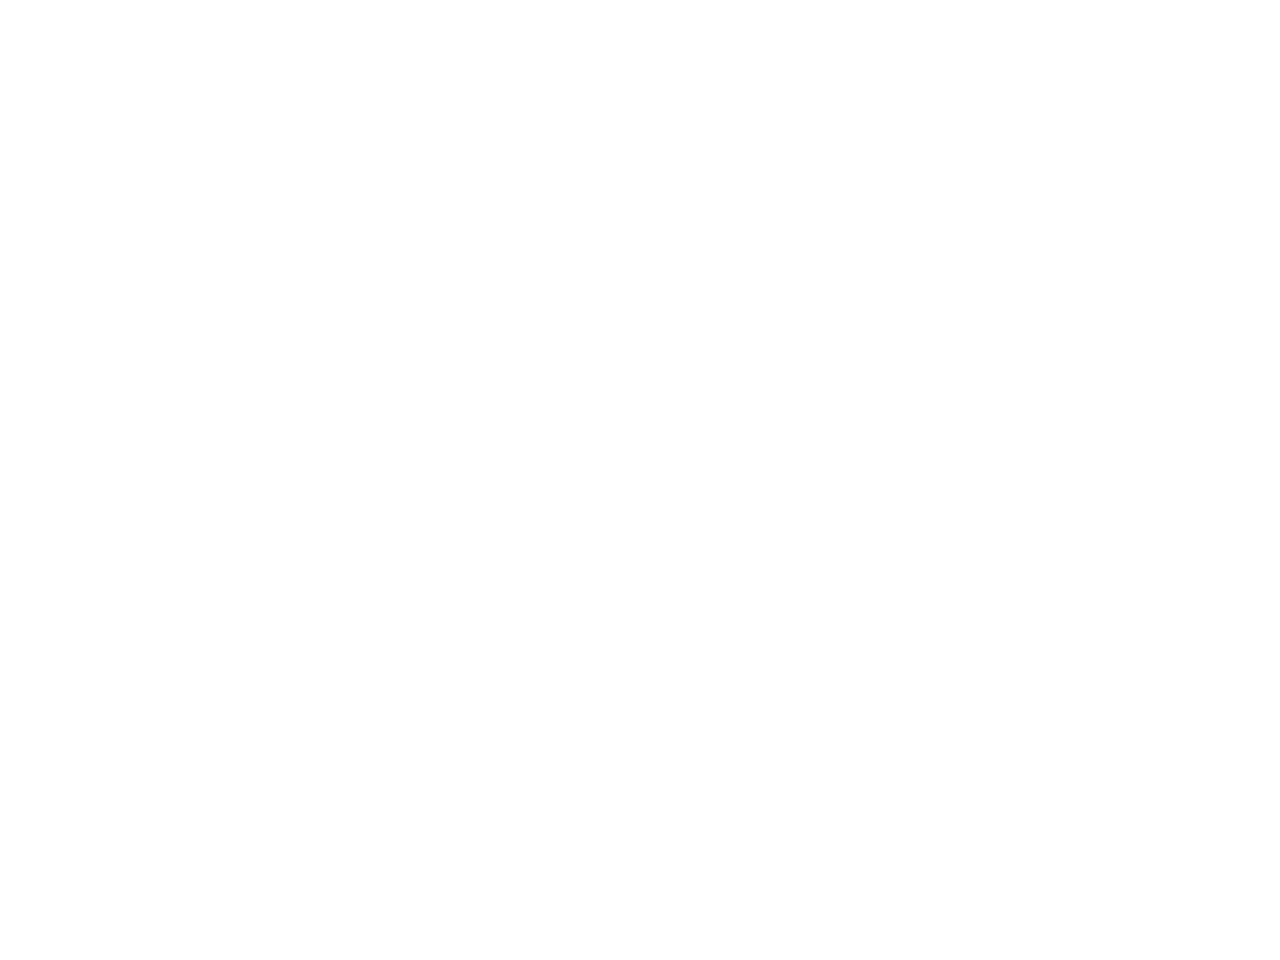

In [21]:
g.plot()
g.highlight_path(path) 

In [22]:
path, length, parents = g.path_UCS('Hughenden', 'Brisbane', verbose=True, summary=True)

FRONTIER: Hughenden(0)
EXPLORED: 
   expand Hughenden
      add Cloncurry to the frontier
      add Charters Towers to the frontier
      add Barcaldine to the frontier
      add Winton to the frontier
     move Hughenden  to the explored list
FRONTIER: Cloncurry(401), Charters Towers(248), Barcaldine(500), Winton(216)
EXPLORED: Hughenden
   expand Winton
      add Longreach to the frontier
      add Boulia to the frontier
      add Windorah to the frontier
     move Winton  to the explored list
FRONTIER: Cloncurry(401), Charters Towers(248), Barcaldine(500), Longreach(396), Boulia(579), Windorah(703)
EXPLORED: Hughenden, Winton
   expand Charters Towers
      add Townsville to the frontier
     move Charters Towers  to the explored list
FRONTIER: Cloncurry(401), Barcaldine(500), Longreach(396), Boulia(579), Windorah(703), Townsville(383)
EXPLORED: Hughenden, Winton, Charters Towers
   expand Townsville
      add Mackay to the frontier
     move Townsville  to the explored list
FRONTIE

In [23]:
length

1659

In [24]:
[p.name for p in path]

['Hughenden', 'Barcaldine', 'Blackall', 'Charleville', 'Roma', 'Brisbane']

In [25]:
g.n

20

<IPython.core.display.Javascript object>


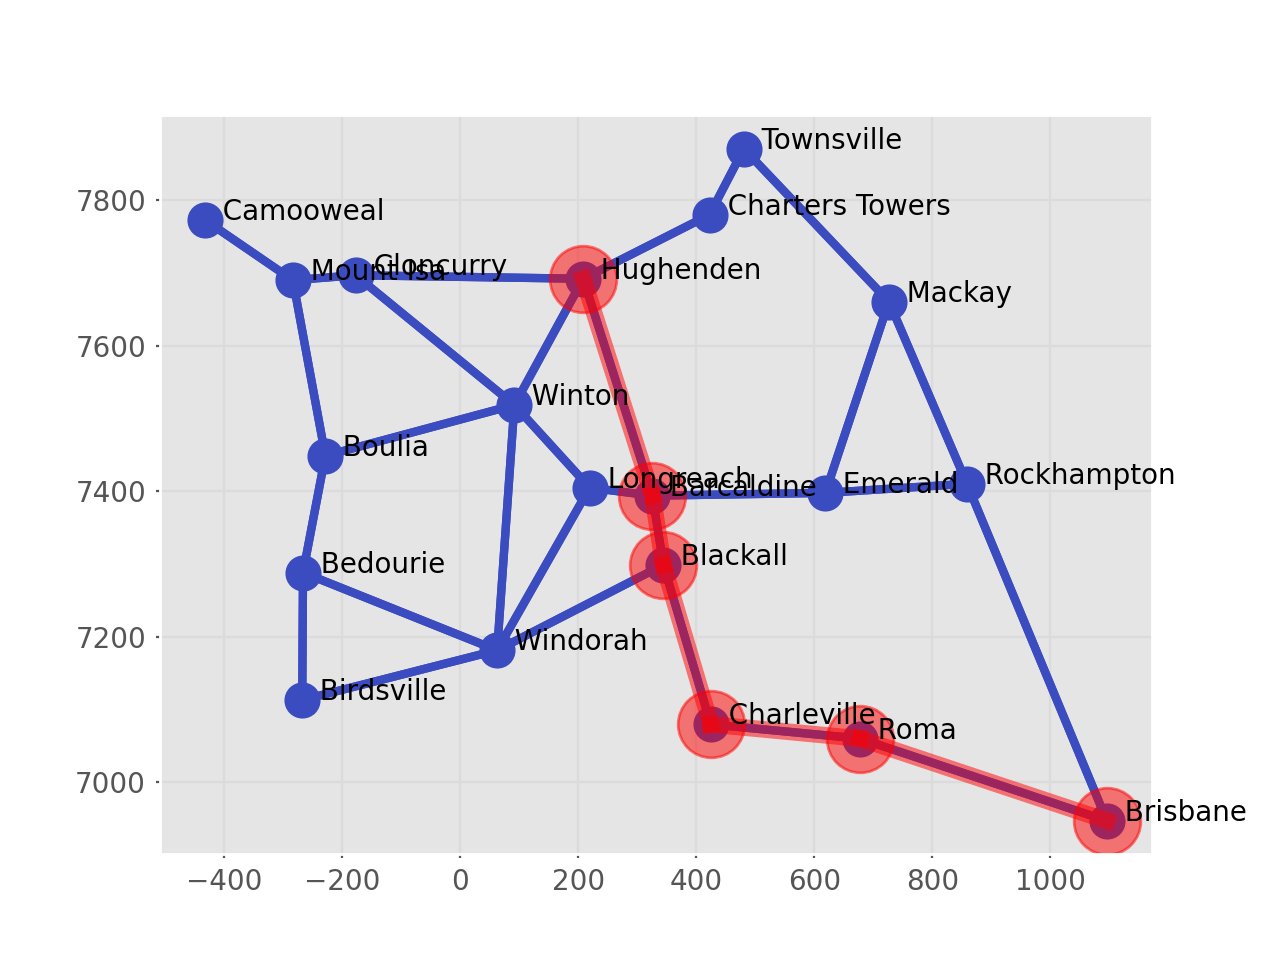

In [38]:
g.plot()
g.highlight_path(path)

In [27]:
tree = DGraph.Dict(parents, reverse=True)
tree.dotfile('ucs_tree.dot', direction='TB')
!dot -Tpdf -o ucs_tree.pdf ucs_tree.dot
!open ucs_tree.pdf

]2;C02D8125PN78:/Users/corkep/code/RVC3-python/chapter5]1;C02D8125PN78]2;C02D8125PN78:/Users/corkep/code/RVC3-python/chapter5]1;C02D8125PN78

In [28]:
from roboticstoolbox import ETS2
ETS2.r() * ETS2.tx(1)

R(q) ⊕ tx(1)

In [29]:
g['Bedourie'].edgeto(g['Birdsville']).cost

193

In [39]:
path, length, parents = g.path_Astar('Hughenden', 'Brisbane', verbose=True, summary=True)

FRONTIER: Hughenden(0)
EXPLORED: 
   expand Hughenden
      add Cloncurry to the frontier
      add Charters Towers to the frontier
      add Barcaldine to the frontier
      add Winton to the frontier
     move Hughenden  to the explored list
FRONTIER: Cloncurry(1878), Charters Towers(1319), Barcaldine(1390), Winton(1371)
EXPLORED: Hughenden
   expand Charters Towers
      add Townsville to the frontier
     move Charters Towers  to the explored list
FRONTIER: Cloncurry(1878), Barcaldine(1390), Winton(1371), Townsville(1493)
EXPLORED: Hughenden, Charters Towers
   expand Winton
      add Longreach to the frontier
      add Boulia to the frontier
      add Windorah to the frontier
     move Winton  to the explored list
FRONTIER: Cloncurry(1878), Barcaldine(1390), Townsville(1493), Longreach(1385), Boulia(1995), Windorah(1762)
EXPLORED: Hughenden, Charters Towers, Winton
   expand Longreach
     move Longreach  to the explored list
FRONTIER: Cloncurry(1878), Barcaldine(1390), Townsville

<IPython.core.display.Javascript object>


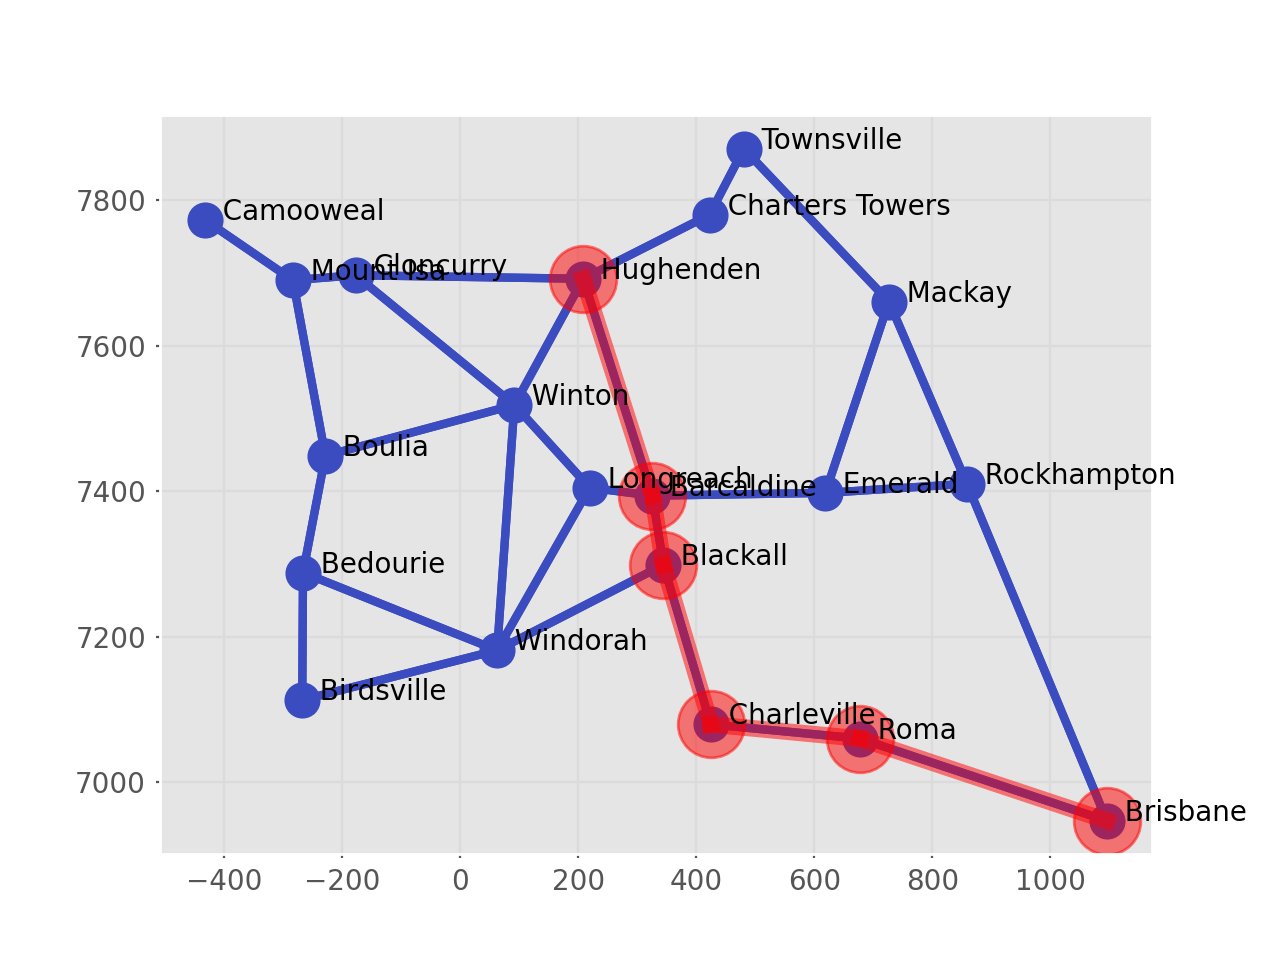

In [40]:
g.plot()
g.highlight_path(path) 

In [42]:
tree = DGraph.Dict(parents, reverse=True)
tree.showgraph(direction='BT')

<IPython.core.display.Javascript object>


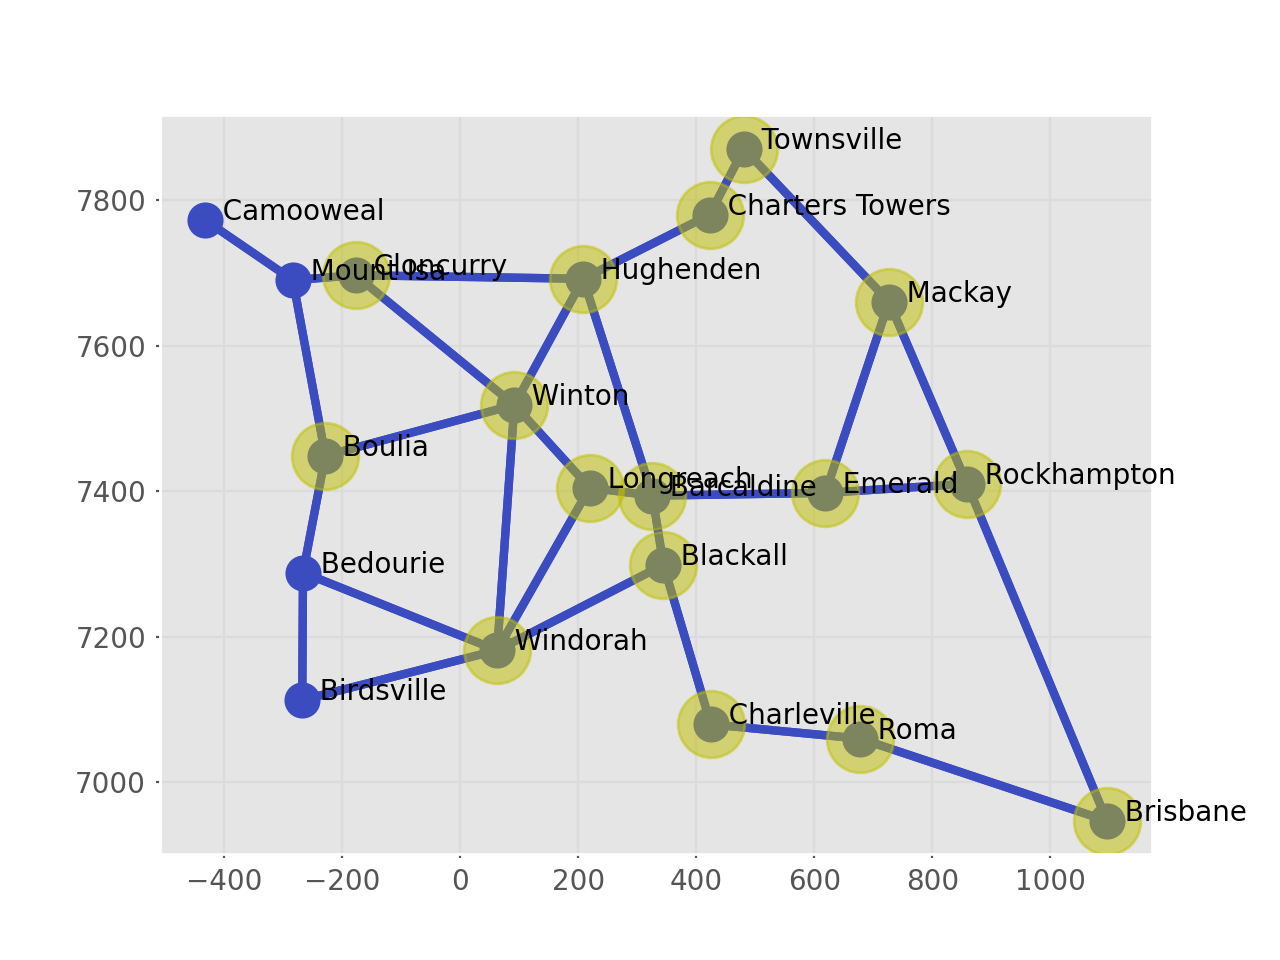

In [43]:
g.plot()
g.highlight_vertex([g[v.name] for v in tree], color='y')

In [34]:
[g[v.name] for v in tree]

[UVertex(name=Cloncurry, coord=[-176.972 7696.748]),
 UVertex(name=Hughenden, coord=[ 208.622 7691.918]),
 UVertex(name=Charters Towers, coord=[ 422.642 7779.83 ]),
 UVertex(name=Barcaldine, coord=[ 325.806 7393.856]),
 UVertex(name=Winton, coord=[  91.948 7518.481]),
 UVertex(name=Townsville, coord=[ 480.764 7870.508]),
 UVertex(name=Longreach, coord=[ 219.591 7404.855]),
 UVertex(name=Boulia, coord=[-228.326 7448.695]),
 UVertex(name=Windorah, coord=[  62.757 7181.357]),
 UVertex(name=Blackall, coord=[ 344.537 7298.781]),
 UVertex(name=Emerald, coord=[ 618.884 7397.625]),
 UVertex(name=Charleville, coord=[ 424.735 7079.569]),
 UVertex(name=Mackay, coord=[ 726.613 7660.525]),
 UVertex(name=Rockhampton, coord=[ 858.854 7410.15 ]),
 UVertex(name=Roma, coord=[ 677.663 7060.014]),
 UVertex(name=Brisbane, coord=[1095.915 6947.044])]

In [8]:
g = UGraph()
for name, info in data['places'].items():
   g.add_vertex(name=name, coord=info["utm"])
for route in data['routes']:
   g.add_edge(route['start'], route['end'], cost=route['distance'] / route['speed'])

In [21]:
g.metric = lambda x: np.linalg.norm(x) / 100

In [22]:
path, length, parents = g.path_Astar('Hughenden', 'Brisbane', verbose=True)

FRONTIER: Hughenden(0)
EXPLORED: 
   expand Hughenden
      add Cloncurry to the frontier
      add Charters Towers to the frontier
      add Barcaldine to the frontier
      add Winton to the frontier
     move Hughenden  to the explored list
FRONTIER: Cloncurry(19), Charters Towers(13), Barcaldine(19), Winton(14)
EXPLORED: Hughenden
   expand Charters Towers
      add Townsville to the frontier
     move Charters Towers  to the explored list
FRONTIER: Cloncurry(19), Barcaldine(19), Winton(14), Townsville(15)
EXPLORED: Hughenden, Charters Towers
   expand Winton
      add Longreach to the frontier
      add Boulia to the frontier
      add Windorah to the frontier
     move Winton  to the explored list
FRONTIER: Cloncurry(19), Barcaldine(19), Townsville(15), Longreach(14), Boulia(24), Windorah(22)
EXPLORED: Hughenden, Charters Towers, Winton
   expand Longreach
 reparent Barcaldine: cost 5.02 via Longreach is less than cost 10.0 via Hughenden, change parent from Hughenden to Longreach

In [23]:
length

16.610000000000003

In [24]:
print([p.name for p in path])

['Hughenden', 'Winton', 'Longreach', 'Barcaldine', 'Blackall', 'Charleville', 'Roma', 'Brisbane']


In [17]:
tree = DGraph.Dict(parents, reverse=True)
tree.showgraph(direction='TB')

In [20]:
r = data['routes']
print([rr for rr in r if rr['speed']< 100])

[{'start': 'Blackall', 'end': 'Windorah', 'distance': 530, 'speed': 50}, {'start': 'Barcaldine', 'end': 'Hughenden', 'distance': 500, 'speed': 50}, {'start': 'Longreach', 'end': 'Windorah', 'distance': 311, 'speed': 50}, {'start': 'Winton', 'end': 'Boulia', 'distance': 363, 'speed': 50}, {'start': 'Winton', 'end': 'Windorah', 'distance': 487, 'speed': 50}, {'start': 'Boulia', 'end': 'Mount Isa', 'distance': 304, 'speed': 50}, {'start': 'Boulia', 'end': 'Bedourie', 'distance': 194, 'speed': 50}, {'start': 'Bedourie', 'end': 'Birdsville', 'distance': 193, 'speed': 50}, {'start': 'Birdsville', 'end': 'Windorah', 'distance': 380, 'speed': 50}, {'start': 'Bedourie', 'end': 'Windorah', 'distance': 411, 'speed': 50}]
